In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import glob

# looping analysis

In [2]:
path3 = 'loops_batch*'
in_files = glob.glob('{}/input_structures/*.pdb'.format(path3))
out_files = glob.glob('{}/output_structures/*.pdb'.format(path3))

in_omegas = []
in_bs = []
in_lens = []
for i in in_files:
    in_omegas.append(-float(i.split("_")[4]))
    in_bs.append(float(i.split("_")[5][:-4]))
    in_lens.append(float(i.split("_")[3]))
out_omegas = []
out_bs = []
out_lens = []
for i in out_files:
    out_omegas.append(-float(i.split("_")[4]))
    out_bs.append(float(i.split("_")[5]))
    out_lens.append(float(i.split("_")[3]))

print(len(out_omegas)/len(in_omegas))

0.6680049197048177


/software/conda/envs/jupyterhub-2204/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


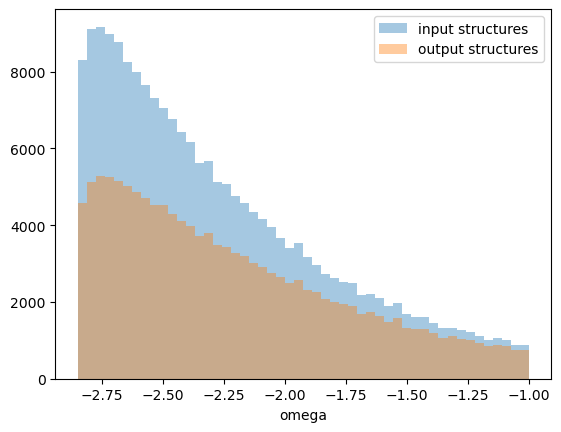

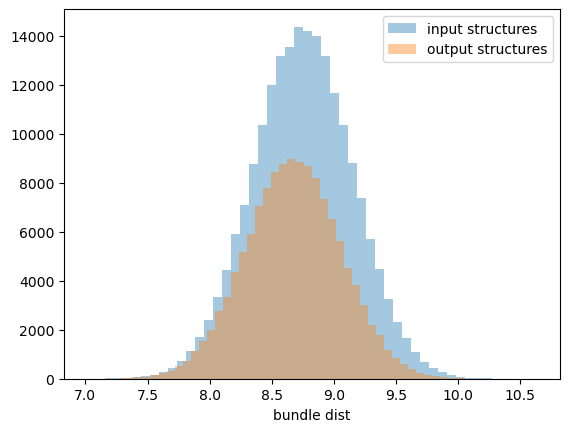

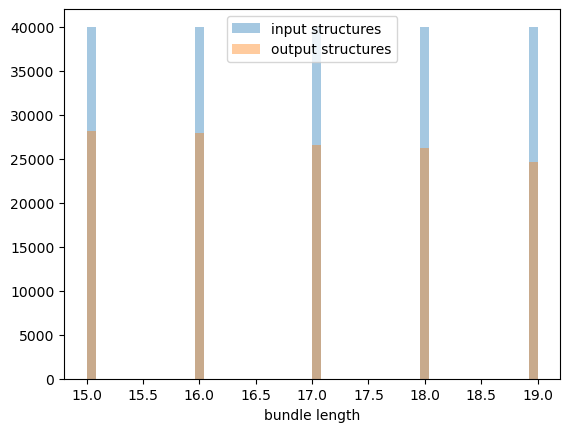

In [3]:
sns.distplot(in_omegas, kde=False, label="input structures")
sns.distplot(out_omegas, kde=False,label="output structures")
plt.xlabel("omega")
plt.legend()
plt.show()

sns.distplot(in_bs, kde=False, label="input structures")
sns.distplot(out_bs, kde=False,label="output structures")
plt.xlabel("bundle dist")
plt.legend()
plt.show()

sns.distplot(in_lens, kde=False, label="input structures")
sns.distplot(out_lens, kde=False,label="output structures")
plt.xlabel("bundle length")
plt.legend()
plt.show()

# read design data

In [4]:
def read_data(score_files):
    df_i=pd.DataFrame()
    for score_file in score_files:
        print(score_file)
        df = pd.read_csv(
            score_file, # file name
            delim_whitespace=True, # columns are separated by spaces
            skiprows=[0], error_bad_lines=False # skip first line/
        )

        
        del df['SCORE:']

        df['name'] = df['description']
        df = df[pd.notnull(df['name'])]
        df.set_index('description', inplace=True)
        df['bundle_len'] = df['name'].apply(lambda x: float(x.split('_')[1]))
        df['omega_param'] = df['name'].apply(lambda x: -float(x.split('_')[2]))
        df['bundle_dist'] = df['name'].apply(lambda x: float(x.split('_')[3]))
        df["nRES"] = df['chain_A_sequence'].str.len()
        df['score_per_res'] = (df['total_score'] / df['nRES']).astype(float)
        df['nALA'] = df['chain_A_sequence'].str.count('A')
        df['percALA']= df['nALA']/df['nRES']
        df['worst9mer']= pd.to_numeric(df['worst9mer'], errors='coerce') # errors to NaN
        df['exposed_hydrophobics_per_res'] = df['exposed_hydrophobics']/df['nRES']
        df['hbond_sr_bb_per_res'] = df['hbond_sr_bb']/df['nRES']
        df['batch'] = score_file
        
        df_i=df_i.append(df)
        
    return df_i

In [5]:
scores = read_data(glob.glob('design_batch*/scores/score.sc'))
scores.shape

design_batch2/scores/score.sc


/scratch/ilutz/50236267/ipykernel_285590/2662767333.py:5: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(
b'Skipping line 15795: expected 48 fields, saw 95\n'
b'Skipping line 23941: expected 48 fields, saw 95\n'
b'Skipping line 53382: expected 48 fields, saw 95\nSkipping line 60621: expected 48 fields, saw 95\nSkipping line 62564: expected 48 fields, saw 95\nSkipping line 63469: expected 48 fields, saw 95\n'
/scratch/ilutz/50236267/ipykernel_285590/2662767333.py:5: DtypeWarning: Columns (44,45) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(
/scratch/ilutz/50236267/ipykernel_285590/2662767333.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_i=df_i.append(df)
/scratch/ilutz/50236267/ipykernel_285590/2662767333.py:5: FutureWarning: The err

design_batch1/scores/score.sc


b'Skipping line 19782: expected 48 fields, saw 95\n'
b'Skipping line 58147: expected 48 fields, saw 95\nSkipping line 58163: expected 48 fields, saw 72\n'
/scratch/ilutz/50236267/ipykernel_285590/2662767333.py:5: DtypeWarning: Columns (44,45) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(
/scratch/ilutz/50236267/ipykernel_285590/2662767333.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_i=df_i.append(df)


(132182, 56)

# scratch

In [376]:
scores.columns

Index(['total_score', 'buns', 'buns_all', 'buried_npsa_FAMILYVW',
       'buried_npsa_FAMILYVW_per_res', 'charge_chA', 'dslf_fa13',
       'exposed_hydrophobics', 'exposed_hydrophobics_old', 'fa_atr',
       'fa_dun_dev', 'fa_dun_rot', 'fa_dun_semi', 'fa_elec',
       'fa_intra_atr_xover4', 'fa_intra_elec', 'fa_intra_rep_xover4',
       'fa_intra_sol_xover4', 'fa_rep', 'fa_sol', 'hbond_bb_sc', 'hbond_lr_bb',
       'hbond_sc', 'hbond_sr_bb', 'holes', 'holes_old', 'hxl_tors', 'lk_ball',
       'lk_ball_bridge', 'lk_ball_bridge_uncpl', 'lk_ball_iso', 'nALA', 'nARG',
       'nHIS', 'nMET', 'nTRP', 'nTYR', 'omega', 'p_aa_pp', 'packstat_all',
       'pro_close', 'psipred', 'rama_prepro', 'ref', 'worst9mer',
       'chain_A_sequence', 'name', 'bundle_len', 'omega_param', 'bundle_dist',
       'nRES', 'score_per_res', 'percALA', 'exposed_hydrophobics_per_res',
       'hbond_sr_bb_per_res', 'batch'],
      dtype='object')

In [68]:
scores['buried_npsa_FAMILYVW_per_res'].describe()

count    66602.000000
mean        57.945181
std          5.078278
min         34.906000
25%         54.549000
50%         58.047000
75%         61.469000
max         76.419000
Name: buried_npsa_FAMILYVW_per_res, dtype: float64

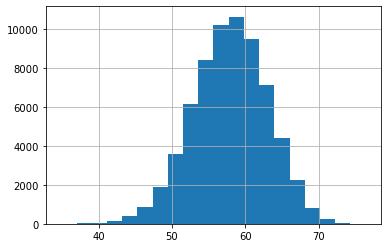

In [69]:
scores['buried_npsa_FAMILYVW_per_res'].hist(bins=20)
plt.show()

In [155]:
print(scores['percALA'].describe())

count    66602.000000
mean         0.099966
std          0.041462
min          0.000000
25%          0.073171
50%          0.086022
75%          0.126316
max          0.309278
Name: percALA, dtype: float64


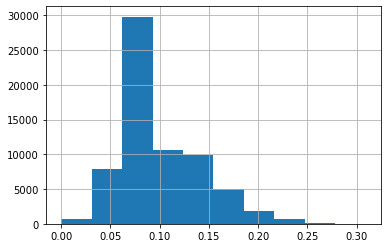

In [16]:
scores['percALA'].hist()

In [17]:
scores['nRES'].describe()

count    66602.000000
mean        91.930407
std          9.268195
min         60.000000
25%         85.000000
50%         92.000000
75%         99.000000
max        122.000000
Name: nRES, dtype: float64

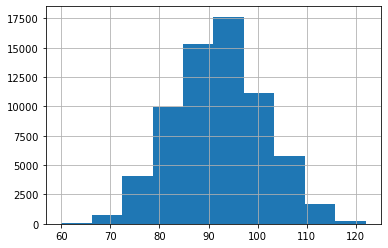

In [18]:
scores['nRES'].hist()

In [19]:
scores['score_per_res'].describe()

count    66602.000000
mean        -2.408150
std          0.156092
min         -3.004473
25%         -2.515196
50%         -2.415402
75%         -2.309163
max         -0.912963
Name: score_per_res, dtype: float64

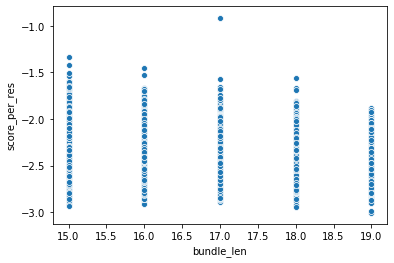

In [20]:
sns.scatterplot(x=scores['bundle_len'],y=scores['score_per_res'])

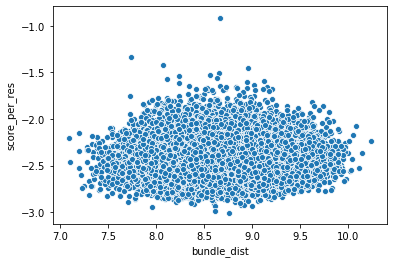

In [21]:
sns.scatterplot(x=scores['bundle_dist'],y=scores['score_per_res'])

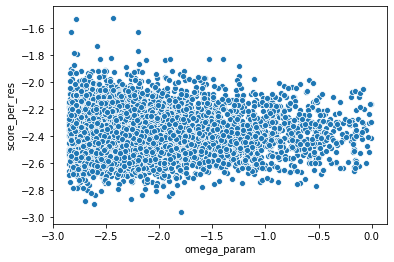

In [10]:
sns.scatterplot(x=scores['omega_param'],y=scores['score_per_res'])

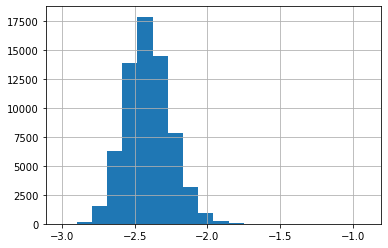

In [22]:
scores['score_per_res'].hist(bins=20)
plt.show()

In [12]:
scores['exposed_hydrophobics'].describe()


count    5837.000000
mean      228.794767
std        80.670249
min        24.988000
25%       170.754000
50%       223.345000
75%       279.962000
max       585.357000
Name: exposed_hydrophobics, dtype: float64

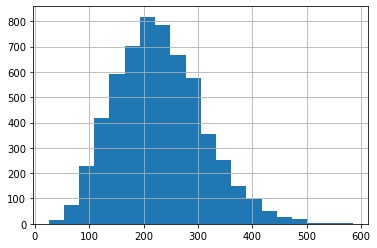

In [13]:
scores['exposed_hydrophobics'].hist(bins=20)
plt.show()

In [119]:
scores['holes'].describe()

count    5790.000000
mean       -1.151148
std         0.698458
min        -4.398000
25%        -1.614750
50%        -1.121000
75%        -0.679000
max         0.943000
Name: holes, dtype: float64

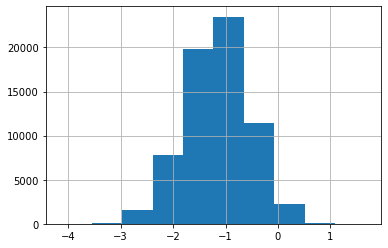

In [23]:
scores['holes'].hist()

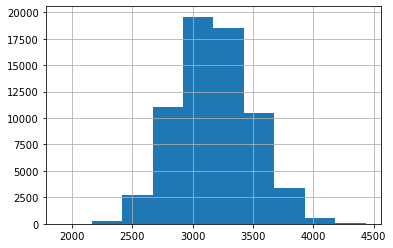

In [84]:
scores['exposed_hydrophobics'].hist()

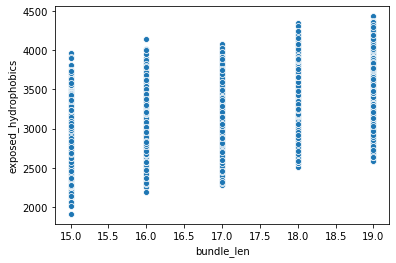

In [114]:
sns.scatterplot(x=scores['bundle_len'],y=scores['exposed_hydrophobics'])

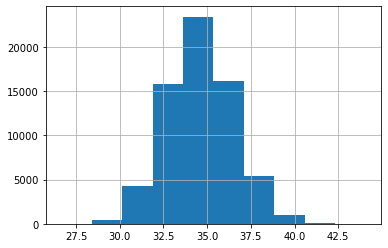

In [113]:
scores['exposed_hydrophobics_per_res'].hist()

In [105]:
scores['worst9mer'].describe()

count    66602.000000
mean         0.549428
std          0.323062
min          0.214000
25%          0.445000
50%          0.507000
75%          0.585000
max          5.000000
Name: worst9mer, dtype: float64

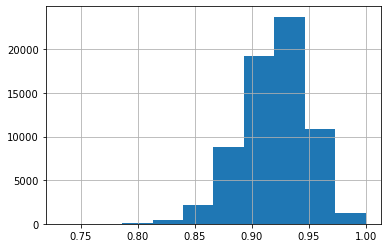

In [106]:
scores['psipred'].hist()

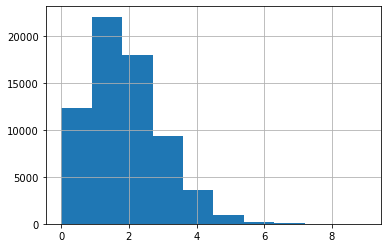

In [107]:
scores['buns'].hist()

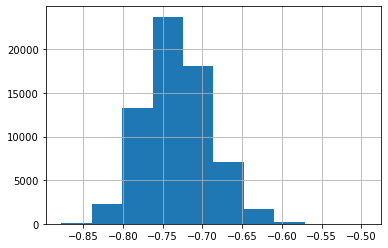

In [112]:
scores['hbond_sr_bb_per_res'].hist()

# filter analysis

In [6]:
# Filters to use: 
    # buried_npsa_FAMILYVW_per_res -- Nihal's, ensure core
    # score_per_res -- standard
    # percALA -- avoid polyA
    # holes -- good packing
    # exposed_hydrophobics_per_res -- Nihal's, adapted for length
    # worst9mer -- cut more early on for better fragment quality later -- only weakly filter
    # hbond_sr_bb -- avoid squashed backbones of helices from poor/extreme sampling
    # buns? -- just to toss really bad ones
    # psi pred? -- just to toss really bad ones

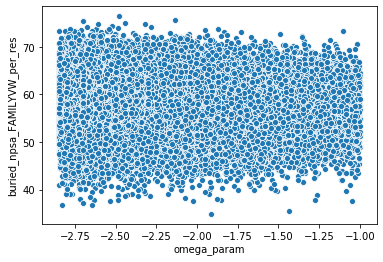

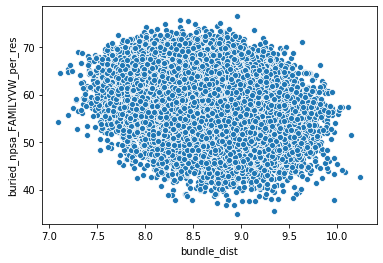

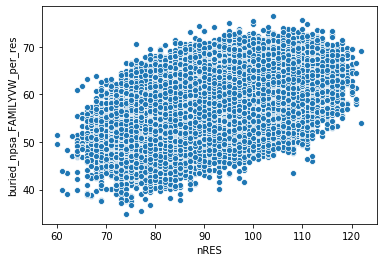

In [254]:
sns.scatterplot(x=scores['omega_param'],y=scores['buried_npsa_FAMILYVW_per_res'])
plt.show()
sns.scatterplot(x=scores['bundle_dist'],y=scores['buried_npsa_FAMILYVW_per_res'])
plt.show()
sns.scatterplot(x=scores['nRES'],y=scores['buried_npsa_FAMILYVW_per_res'])
plt.show()

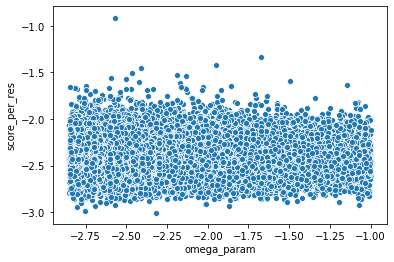

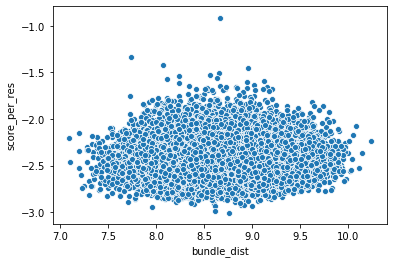

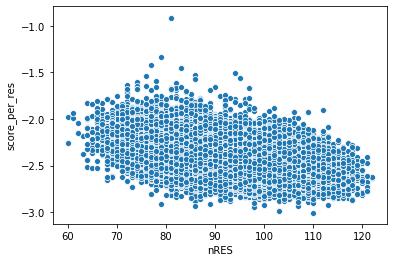

In [255]:
sns.scatterplot(x=scores['omega_param'],y=scores['score_per_res'])
plt.show()
sns.scatterplot(x=scores['bundle_dist'],y=scores['score_per_res'])
plt.show()
sns.scatterplot(x=scores['nRES'],y=scores['score_per_res'])
plt.show()

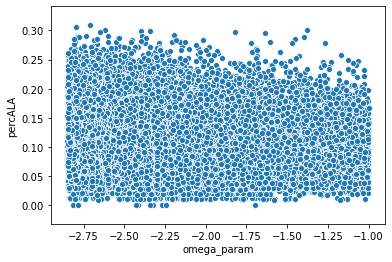

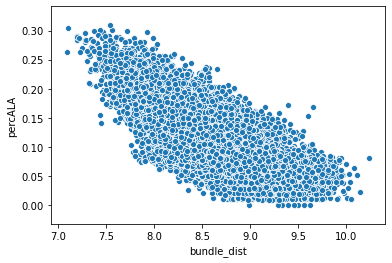

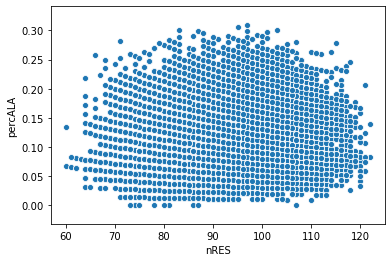

In [256]:
sns.scatterplot(x=scores['omega_param'],y=scores['percALA'])
plt.show()
sns.scatterplot(x=scores['bundle_dist'],y=scores['percALA'])
plt.show()
sns.scatterplot(x=scores['nRES'],y=scores['percALA'])
plt.show()

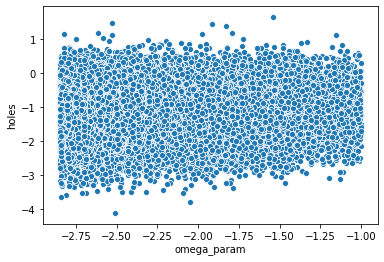

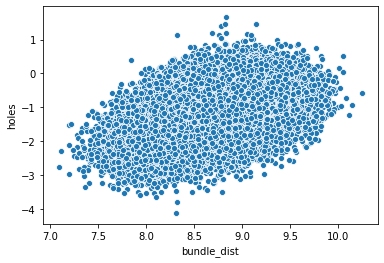

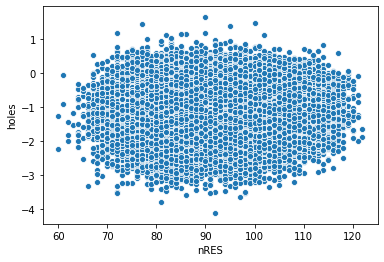

In [257]:
sns.scatterplot(x=scores['omega_param'],y=scores['holes'])
plt.show()
sns.scatterplot(x=scores['bundle_dist'],y=scores['holes'])
plt.show()
sns.scatterplot(x=scores['nRES'],y=scores['holes'])
plt.show()

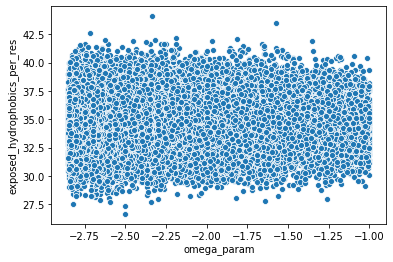

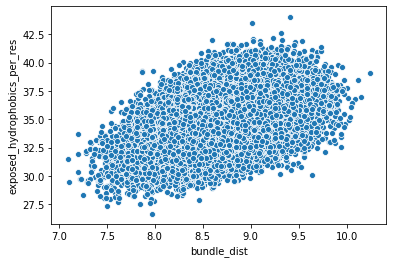

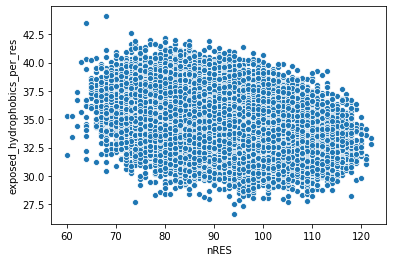

In [258]:
sns.scatterplot(x=scores['omega_param'],y=scores['exposed_hydrophobics_per_res'])
plt.show()
sns.scatterplot(x=scores['bundle_dist'],y=scores['exposed_hydrophobics_per_res'])
plt.show()
sns.scatterplot(x=scores['nRES'],y=scores['exposed_hydrophobics_per_res'])
plt.show()

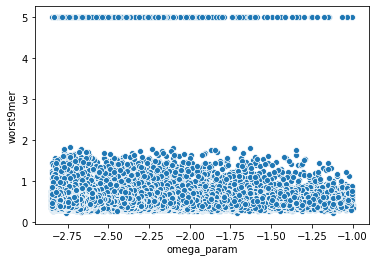

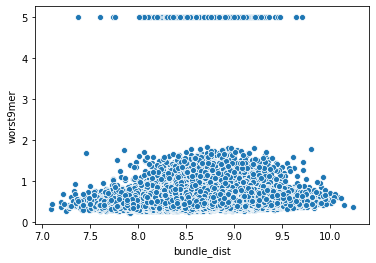

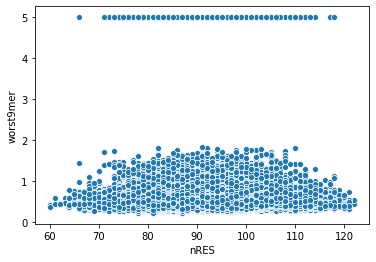

In [259]:
sns.scatterplot(x=scores['omega_param'],y=scores['worst9mer'])
plt.show()
sns.scatterplot(x=scores['bundle_dist'],y=scores['worst9mer'])
plt.show()
sns.scatterplot(x=scores['nRES'],y=scores['worst9mer'])
plt.show()

as expected, more supercoiling means slightly worse hbond_sr_bb -- more squash from extreme sampling


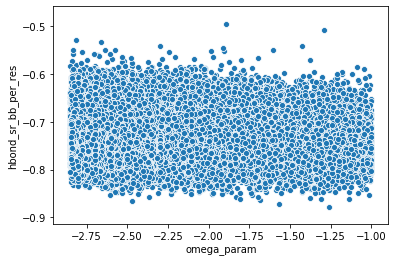

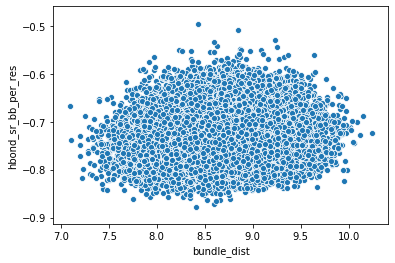

interesting that shorter designs are also worse -- maybe less to stabilize helices from twisting


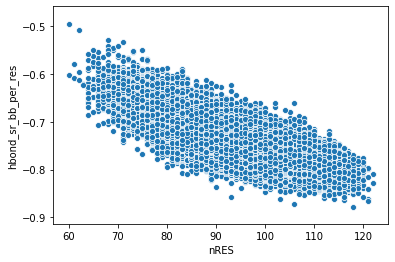

In [336]:
print('as expected, more supercoiling means slightly worse hbond_sr_bb -- more squash from extreme sampling')
sns.scatterplot(x=scores['omega_param'],y=scores['hbond_sr_bb_per_res'])
plt.show()
sns.scatterplot(x=scores['bundle_dist'],y=scores['hbond_sr_bb_per_res'])
plt.show()
print('interesting that shorter designs are also worse -- maybe less to stabilize helices from twisting')
sns.scatterplot(x=scores['nRES'],y=scores['hbond_sr_bb_per_res'])
plt.show()

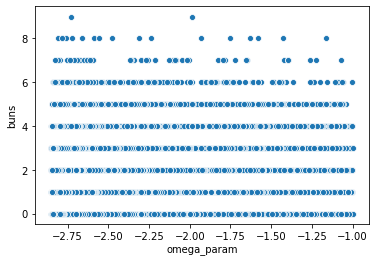

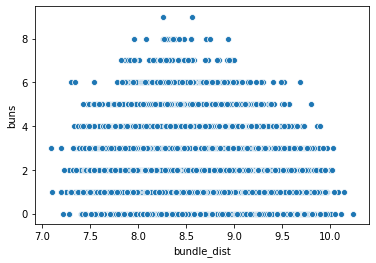

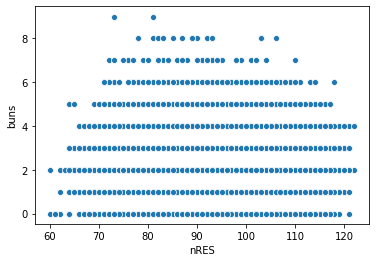

In [261]:
sns.scatterplot(x=scores['omega_param'],y=scores['buns'])
plt.show()
sns.scatterplot(x=scores['bundle_dist'],y=scores['buns'])
plt.show()
sns.scatterplot(x=scores['nRES'],y=scores['buns'])
plt.show()

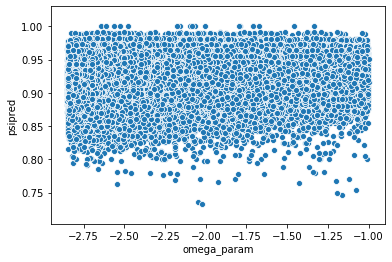

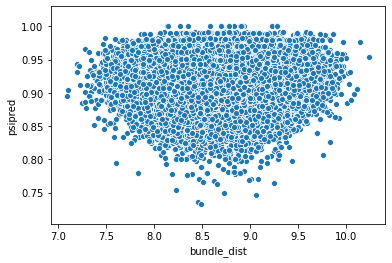

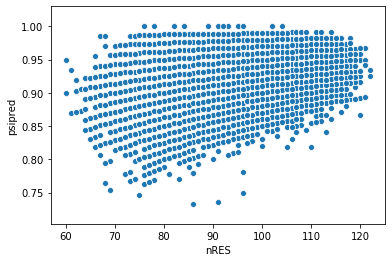

In [262]:
sns.scatterplot(x=scores['omega_param'],y=scores['psipred'])
plt.show()
sns.scatterplot(x=scores['bundle_dist'],y=scores['psipred'])
plt.show()
sns.scatterplot(x=scores['nRES'],y=scores['psipred'])
plt.show()

# final filtering, grab structures

In [7]:
len(scores)

132182

95437

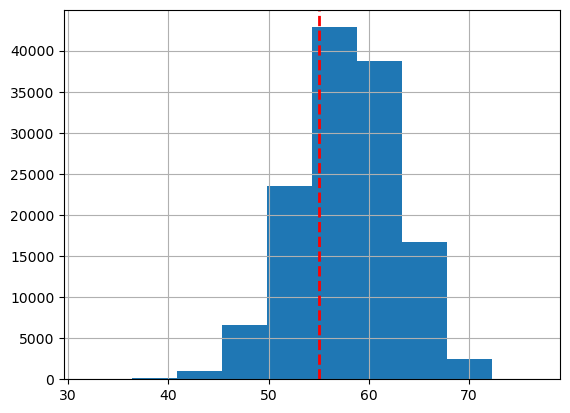

In [8]:
scores['buried_npsa_FAMILYVW_per_res'].hist()
thresh = 55
scores1=scores[scores['buried_npsa_FAMILYVW_per_res'] >= thresh]# Nihal used >=80]
plt.axvline(x=thresh, color='r', linestyle='dashed', linewidth=2)
len(scores1)

60885

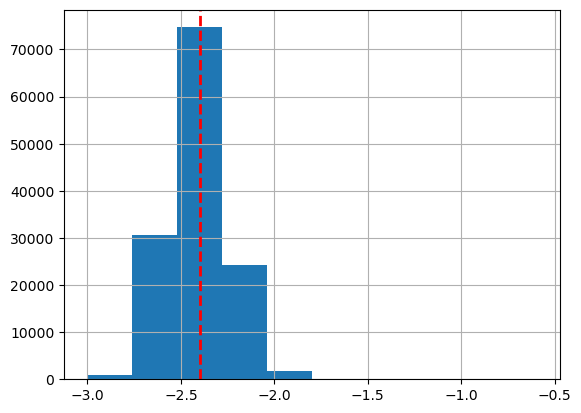

In [9]:
scores['score_per_res'].hist()
thresh = -2.4
scores2=scores1[scores1['score_per_res'] <= thresh]# Nihal used <= -3.0, but different scoring I think]
plt.axvline(x=thresh, color='r', linestyle='dashed', linewidth=2)
len(scores2)

38355

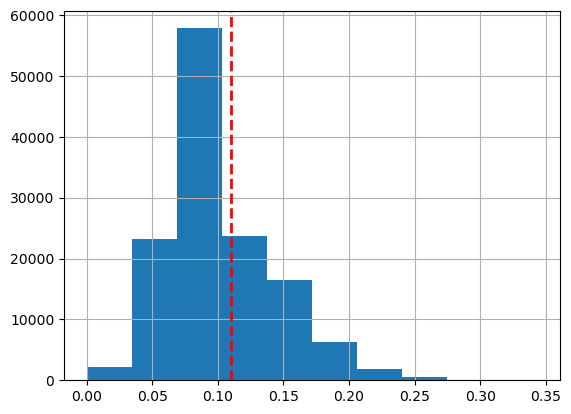

In [10]:
scores['percALA'].hist()
thresh = 0.11
scores3=scores2[scores2['percALA'] <= thresh]
plt.axvline(x=thresh, color='r', linestyle='dashed', linewidth=2)
len(scores3)

37440

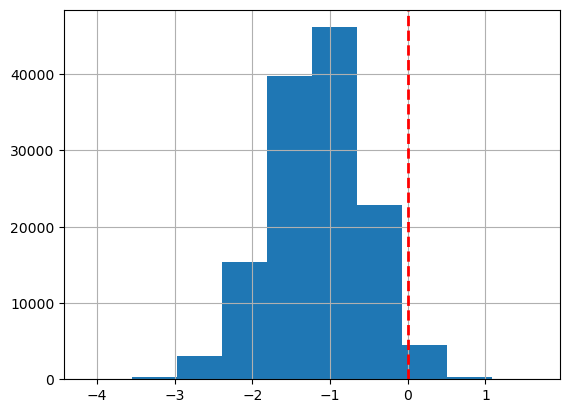

In [11]:
scores['holes'].hist()
thresh = 0
scores4=scores3[scores3['holes'] <= thresh ]# Nihal used <= 0]
plt.axvline(x=thresh, color='r', linestyle='dashed', linewidth=2)
len(scores4)

22584

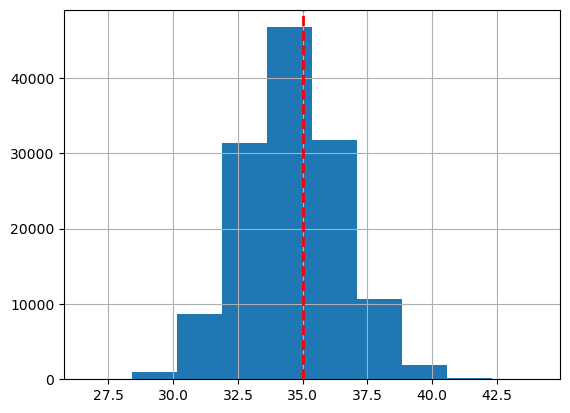

In [12]:
scores['exposed_hydrophobics_per_res'].hist()
thresh = 35
scores5=scores4[scores4['exposed_hydrophobics_per_res'] <= thresh]# Nihal used <= 3500 absolute (not per res)]
plt.axvline(x=thresh, color='r', linestyle='dashed', linewidth=2)
len(scores5)

20560

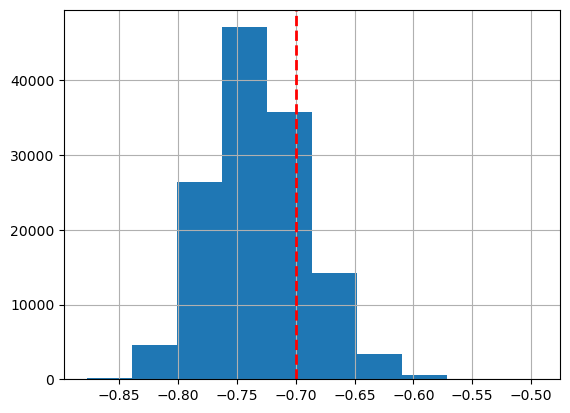

In [13]:
scores['hbond_sr_bb_per_res'].hist() # more loop content bias
thresh = -0.7
scores6=scores5[scores5['hbond_sr_bb_per_res'] <= thresh]
plt.axvline(x=thresh, color='r', linestyle='dashed', linewidth=2)
len(scores6)

20194

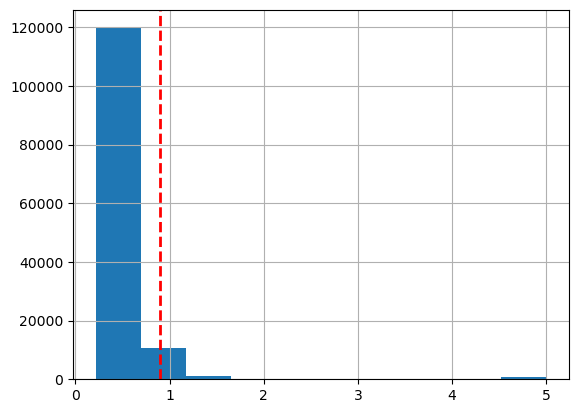

In [14]:
scores['worst9mer'].hist()
thresh = 0.9
scores7 = scores6[scores6['worst9mer'] < thresh]
plt.axvline(x=thresh, color='r', linestyle='dashed', linewidth=2)
len(scores7)

19436

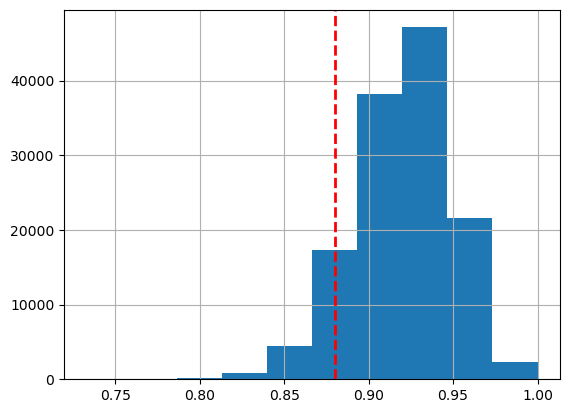

In [15]:
scores['psipred'].hist()
thresh = 0.88
scores8 = scores7[scores7['psipred'] > thresh]
plt.axvline(x=thresh, color='r', linestyle='dashed', linewidth=2)
len(scores8)

18219

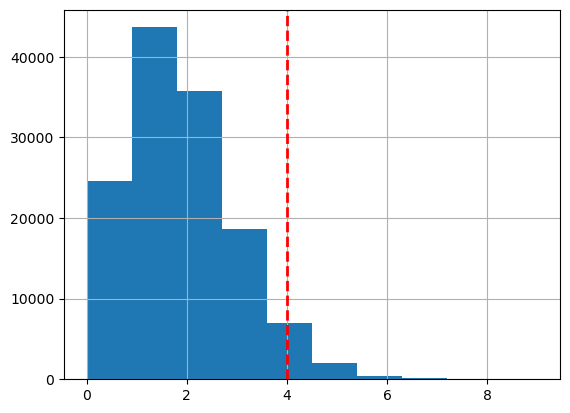

In [16]:
scores['buns'].hist()
thresh = 4
scores9 = scores8[scores8['buns'] < thresh]
plt.axvline(x=thresh, color='r', linestyle='dashed', linewidth=2)
len(scores9)

18193

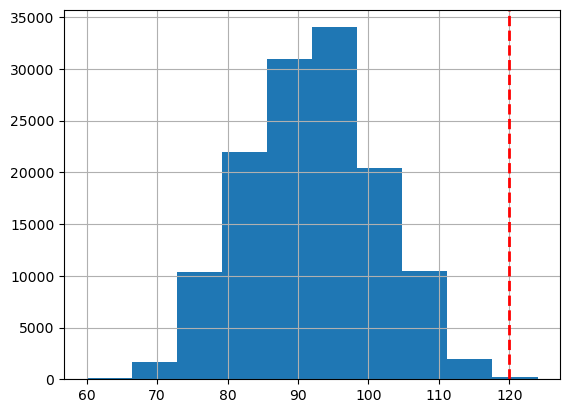

In [17]:
scores['nRES'].hist()
thresh = 120
scores10 = scores9[scores9['nRES'] < thresh]
plt.axvline(x=thresh, color='r', linestyle='dashed', linewidth=2)
len(scores10)

In [18]:
scores_final = scores10
len(scores_final)

18193

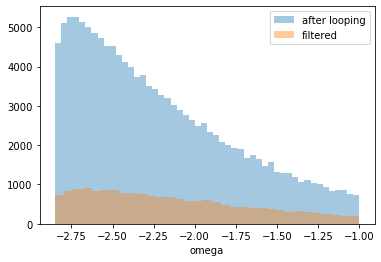

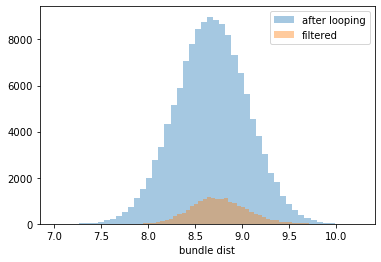

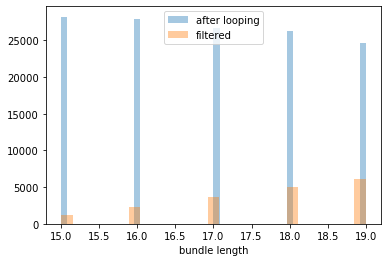

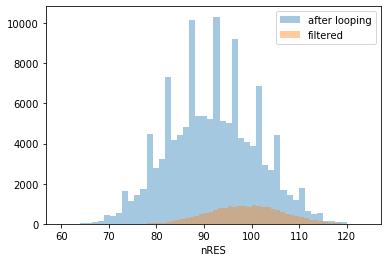

In [46]:
sns.distplot(out_omegas, kde=False,label="after looping")
sns.distplot(scores_final['omega_param'], kde=False,label="filtered")
plt.xlabel("omega")
plt.legend()
plt.show()

sns.distplot(out_bs, kde=False,label="after looping")
sns.distplot(scores_final['bundle_dist'], kde=False,label="filtered")
plt.xlabel("bundle dist")
plt.legend()
plt.show()


sns.distplot(out_lens, kde=False,label="after looping")
sns.distplot(scores_final['bundle_len'], kde=False,label="filtered")
plt.xlabel("bundle length")
plt.legend()
plt.show()

sns.distplot(scores['nRES'], kde=False,label="after looping")
sns.distplot(scores_final['nRES'],kde=False,label="filtered")
plt.xlabel("nRES")
plt.legend()
plt.show()

In [19]:
len(scores_final)

18193

3

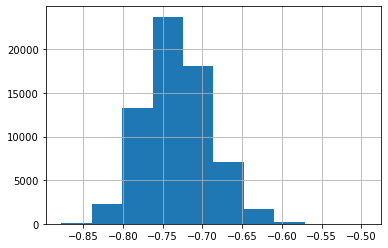

In [329]:
scores['hbond_sr_bb_per_res'].hist()
scores_test = scores[scores['hbond_sr_bb_per_res'] > -0.6]
len(scores_test)

In [20]:
scores_test = scores_final

In [424]:
names = []
for i in scores_test['name']:
    names.append(i)

for _ in range(25):
    print(f'cp grooves/design_batch1/output_structures/{names[int(np.random.random()*len(names))]}.pdb scratch_sele/ ;')

cp grooves/design_batch1/output_structures/3h_18_2.261_8.166_0001_0001.pdb scratch_sele/ ;
cp grooves/design_batch1/output_structures/3h_18_2.73_9.127_0001_0001.pdb scratch_sele/ ;
cp grooves/design_batch1/output_structures/3h_19_1.613_8.587_0001_0001.pdb scratch_sele/ ;
cp grooves/design_batch1/output_structures/3h_18_2.313_8.499_0001_0001.pdb scratch_sele/ ;
cp grooves/design_batch1/output_structures/3h_17_1.995_8.233_0001_0001.pdb scratch_sele/ ;
cp grooves/design_batch1/output_structures/3h_18_2.491_8.768_0001_0001.pdb scratch_sele/ ;
cp grooves/design_batch1/output_structures/3h_17_1.468_8.658_0001_0001.pdb scratch_sele/ ;
cp grooves/design_batch1/output_structures/3h_19_2.137_8.839_0001_0001.pdb scratch_sele/ ;
cp grooves/design_batch1/output_structures/3h_16_2.09_8.744_0001_0001.pdb scratch_sele/ ;
cp grooves/design_batch1/output_structures/3h_19_2.562_8.229_0001_0001.pdb scratch_sele/ ;
cp grooves/design_batch1/output_structures/3h_18_2.622_8.729_0001_0001.pdb scratch_sele/ ;
c

In [48]:
with open('copy_filtered.sh', 'w') as file:
    for i,j in scores_final.iterrows():
        name = i
        design_batch = j['batch'].split('/')[0]
        file.write(f'cp {design_batch}/output_structures/{name}.pdb filtered/ ;' + '\n')

# final graphs

/software/conda/envs/jupyterhub-2204/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


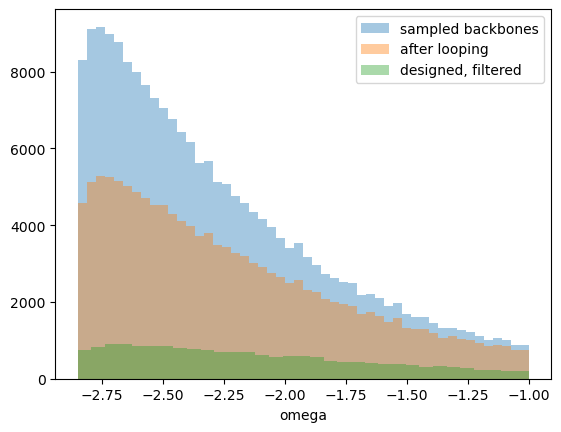

In [21]:
sns.distplot(in_omegas, kde=False, label="sampled backbones")
sns.distplot(out_omegas, kde=False,label="after looping")
sns.distplot(scores_final['omega_param'], kde=False,label="designed, filtered")
plt.xlabel("omega")
plt.legend()
plt.savefig('supercoiling_final.pdf')

/software/conda/envs/jupyterhub-2204/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


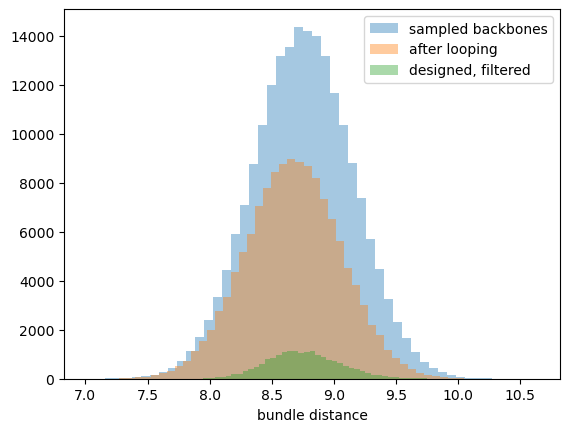

In [22]:

sns.distplot(in_bs, kde=False, label="sampled backbones")
sns.distplot(out_bs, kde=False,label="after looping")
sns.distplot(scores_final['bundle_dist'], kde=False,label="designed, filtered")
plt.xlabel("bundle distance")
plt.legend()
plt.savefig('bundle_distance_final.pdf')


/software/conda/envs/jupyterhub-2204/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


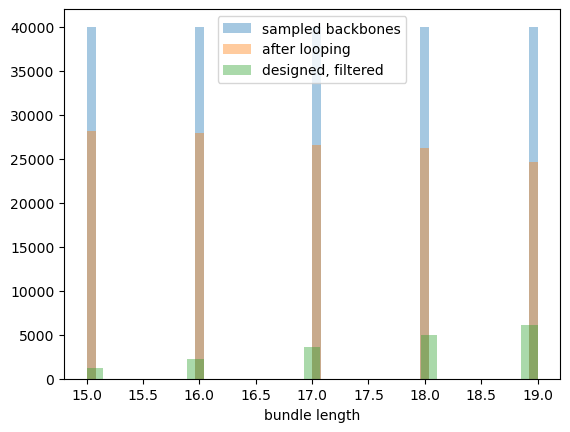

In [23]:


sns.distplot(in_lens, kde=False, label="sampled backbones")
sns.distplot(out_lens, kde=False,label="after looping")
sns.distplot(scores_final['bundle_len'], kde=False,label="designed, filtered")
plt.xlabel("bundle length")
plt.legend()
plt.savefig('length_final.pdf')

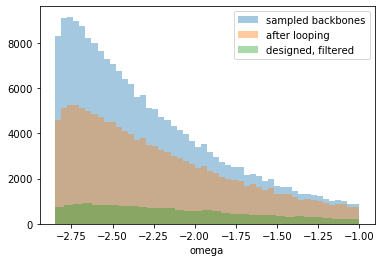

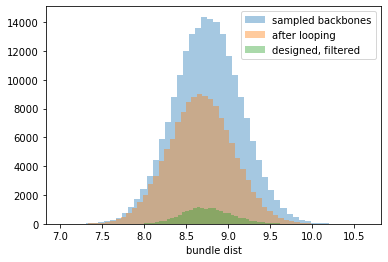

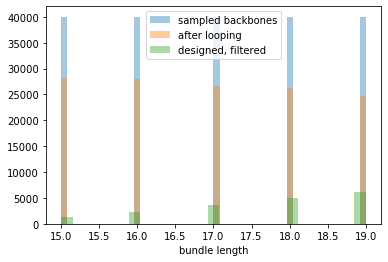

In [29]:
sns.distplot(in_omegas, kde=False, label="sampled backbones")
sns.distplot(out_omegas, kde=False,label="after looping")
sns.distplot(scores_final['omega_param'], kde=False,label="designed, filtered")
plt.xlabel("omega")
plt.legend()
plt.show()

sns.distplot(in_bs, kde=False, label="sampled backbones")
sns.distplot(out_bs, kde=False,label="after looping")
sns.distplot(scores_final['bundle_dist'], kde=False,label="designed, filtered")
plt.xlabel("bundle dist")
plt.legend()
plt.show()

sns.distplot(in_lens, kde=False, label="sampled backbones")
sns.distplot(out_lens, kde=False,label="after looping")
sns.distplot(scores_final['bundle_len'], kde=False,label="designed, filtered")
plt.xlabel("bundle length")
plt.legend()
plt.show()

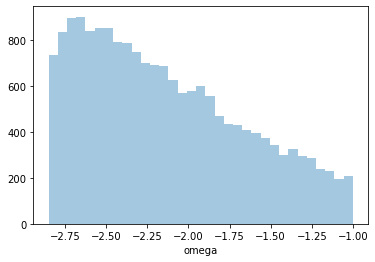

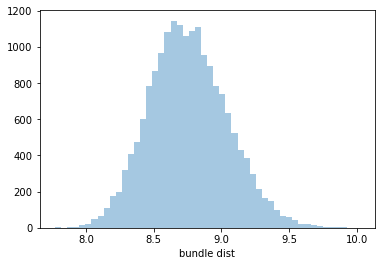

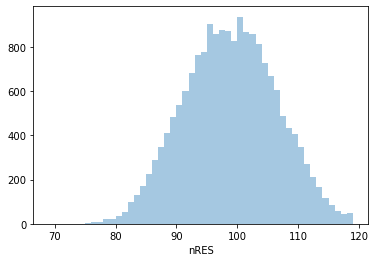

In [30]:
sns.distplot(scores_final['omega_param'], kde=False)
plt.xlabel("omega")
plt.show()

sns.distplot(scores_final['bundle_dist'], kde=False)
plt.xlabel("bundle dist")
plt.show()

sns.distplot(scores_final['nRES'], kde=False)
plt.xlabel("nRES")
plt.show()

# trunk/AF2

In [45]:
trunk_18k = []
with open('/net/scratch/svt4/run2_trunk_model/output','r') as file:
    for lnd,line in enumerate(file):
        if lnd != 0:
            trunk_18k.append(float(line.split(',')[3]))

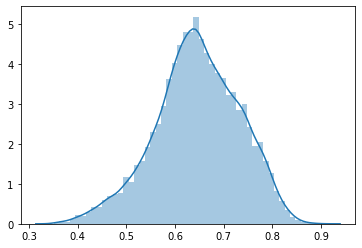

In [46]:
sns.distplot(trunk_18k)

In [48]:
len([x for x in trunk_18k if x > 0.8]) / len(trunk_18k)

0.026402640264026403

In [52]:
len([x for x in trunk_18k if x > 0.8])

5010

In [50]:
18000*2/60/24

25.0

In [24]:
names_18k = []
trunk_18k = []
with open('/net/scratch/svt4/run2_trunk_model/output','r') as file:
    for lnd,line in enumerate(file):
        if lnd != 0:
            trunk_18k.append(float(line.split(',')[4]))
            names_18k.append(line.split(',')[0][:-4])            

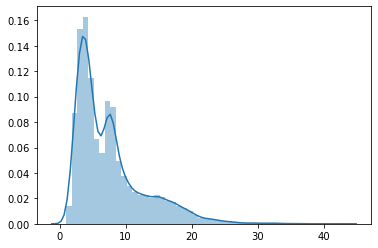

In [25]:
sns.distplot(trunk_18k)

In [26]:
naming_dict = {}
with open('/home/ilutz/HELIX_BINDERS/targets/trunk/201230_order_naming.csv','r') as file:
    for lnd,line in enumerate(file):
        if lnd != 0:
            naming_dict[line.split(',')[0]] = line.split(',')[1]

In [35]:
order_trunk = {}
with open('/home/ilutz/HELIX_BINDERS/targets/trunk/output','r') as file:
    for lnd,line in enumerate(file):
        if lnd != 0:
            nam = line.split(',')[0]
            nam1 = glob.glob(f'/home/ilutz/HELIX_BINDERS/targets/trunk/in/{nam}*.pdb')[0].split('/')[-1]
            name = naming_dict['_'.join(nam1.split('_')[1:])]
            order_trunk['_'.join(name[:-5].split('_')[:6])] = float(line.split(',')[4])

Text(0, 0.5, 'after interface design')

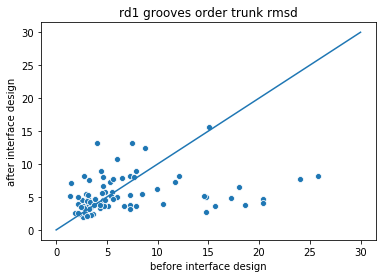

In [44]:
before = []
after = []
for ind,i in enumerate(names_18k):
    if i in order_trunk:
        before.append(trunk_18k[ind])
        after.append(order_trunk[i])
sns.scatterplot(x=before,y=after)
sns.lineplot(x=[0,30],y=[0,30])
plt.title('rd1 grooves order trunk rmsd')
plt.xlabel('before interface design')
plt.ylabel('after interface design')